In [4]:
import numdifftools as nd
import sys 
import math
import xarray as xr
import cartopy.crs as ccrs
import matplotlib as mpl
from matplotlib import pyplot as plt 
import matplotlib.pylab as plt
from sklearn.decomposition import PCA
import matplotlib.path as mpath
from matplotlib.pyplot import figure
import numpy as np
import scipy as sp
import cartopy.feature as cfeature
import pandas as pd 
import statistics
import traceback
import imageio
import os, glob


In [5]:
#A set constants
dU=10 #m/s
b = 30 * 1000 #in m, if 100 get rouch edges. Why? 
L = 1000 * 1000 #in m 
Nx = 201 #dx = 5,000
#Nx = 501 #dx = 2000
#Nx = 51 #dx=20,000
dx = L/(Nx-1)
N=50
#N=10
#N=100
#print(dx)

In [7]:
# build array representing U(x) at discretized x locations # build array for x, which builds the working space  
ux_arr=np.zeros(Nx)
x_arr=np.zeros(Nx)
x_arr2=np.zeros(N)

for i in range(0,Nx):
    x_arr[i] = i*dx
    ux_arr[i]=dU/ (1+ (x_arr[i]- (L/2))**2 /b**2)
    
for i in range(0,N):
    x_arr2[i] = i*dx


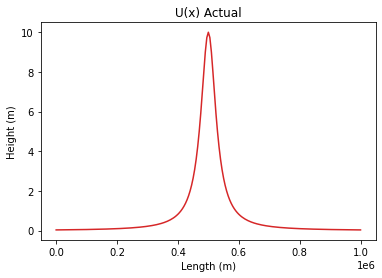

In [8]:
# Create Plots 
plt.plot(x_arr, ux_arr, color='tab:red')
plt.title('U(x) Actual')
plt.xlabel('Length (m)')
plt.ylabel('Height (m)')
plt.show()


In [9]:

Kn_arr2=np.zeros(N)
sum_arr2=np.zeros(Nx)
sum_arr3=np.zeros(Nx)
Un_arr=np.zeros(N)
xi_arr=np.zeros(Nx)

for i in range (0,N):
    Kn_arr2[i]=i*np.pi/L
    sum_arr2=0
    for j in range (0,Nx):
        sum_arr2=sum_arr2+ (ux_arr[j]*np.sin(Kn_arr2[i]* x_arr[j]))
    Un_arr[i]= sum_arr2*(2/L)*dx  


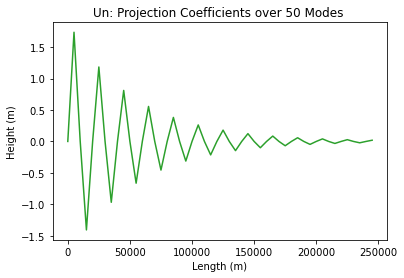

In [10]:
# Create Plots 
plt.plot(x_arr2, Un_arr, color='tab:green')
plt.title('Un: Projection Coefficients over 50 Modes ')
plt.xlabel('Length (m)')
plt.ylabel('Height (m)')
plt.show()

In [11]:
# G build sln Ux= sum....
#the eigenfunction

Ubuilt_arr=np.zeros(Nx)

for j in range (0,Nx):
    sum_arr2=0
    for i in range (0,N):
        sum_arr2=sum_arr2+ (Un_arr[i]*np.sin(Kn_arr2[i]* x_arr[j]))
    Ubuilt_arr[j]= sum_arr2  
                                                                 

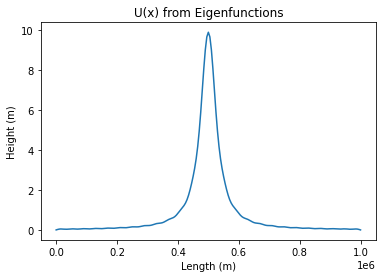

In [12]:
# Create Plots 

plt.plot(x_arr, Ubuilt_arr, color='tab:blue')
plt.title('U(x) from Eigenfunctions')
plt.xlabel('Length (m)')
plt.ylabel('Height (m)')
plt.show()

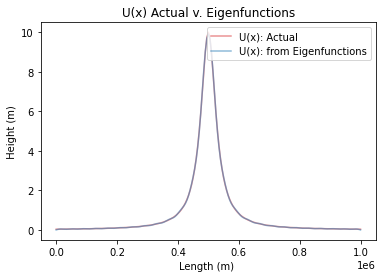

In [13]:
# Create Plots 
plt.plot(x_arr, ux_arr, color='tab:red', alpha=0.50, label='U(x): Actual')
plt.plot(x_arr, Ubuilt_arr, color='tab:blue', alpha=0.50, label='U(x): from Eigenfunctions')
plt.legend(loc="upper right")
plt.title('U(x) Actual v. Eigenfunctions')
plt.xlabel('Length (m) ')
plt.ylabel(' Height (m) ')
plt.show()


In [14]:
#HW2 
#g
#build solution summed over t and x
dh=10 #m/s
b= 500*1000 #m given 
#b= 50*1000 #m 
L= 30000*1000 #m given 
#L= 3000*1000 #m
Nx = 201 
dx = L/(Nx-1)
N=80

c=100 #m/s^2
f= 10**-4 #1/s
#c/f is rossby rad of def - grav and cor about same, so see cor, 1000km, large b not much happens, small b COR kicks in
dt= 600 #s
tau=180000 #s # given
#tau=18000
Nt= 300 #given Nt
#Nt=30

#set up initial bump
hx_arr=np.zeros(Nx)
x_arr=np.zeros(Nx)

for i in range(0,Nx):
    x_arr[i] = i*dx
    hx_arr[i]=dh/ (1+ (x_arr[i]- (L/2))**2 /b**2)

#calculate coefficients     
Kn_arr=np.zeros(N)
Cn_arr=np.zeros(N)
w_arr=np.zeros(N)

for i in range (-N,N):
    Kn_arr[i]=i*np.pi/L
    w_arr[i]=np.sqrt((c**2)*Kn_arr[i]**2+f**2)
    #w_arr[i]=np.sqrt((c**2)*Kn_arr[i]**2)
    #print(Kn_arr)
    sum_arr=0
    for j in range (0,Nx):
        sum_arr=sum_arr+ (hx_arr[j]*np.sin(Kn_arr[i]* x_arr[j]))
    Cn_arr[i]= sum_arr*(2/L)*dx  

Cn_arr[0]=2*Cn_arr[0]    
    
#sum over space & time 
Hbuilt_arr=np.zeros((Nx,Nt))
t_arr=np.zeros(Nt)

for it in range(0,Nt):
    t_arr[it] = dt*it
    for j in range (0,Nx):
        sum_arr2=0
        for i in range (-N,N):
            sum_arr2=sum_arr2+ (Cn_arr[i]*0.5*np.sin(Kn_arr[i]* x_arr[j]))* np.cos(w_arr[i]*t_arr[it])
        Hbuilt_arr[j,it]= sum_arr2  


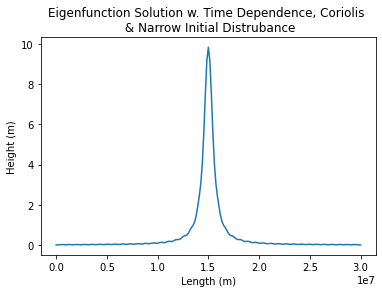

In [15]:
#h 
#view time-dependent solution. How do the waves evolve? Is inital disturbance shape preserved? 
plt.plot(x_arr, Hbuilt_arr[:,0], color='tab:blue')
#plt.title('Eigenfunction Solution w. Time Dependence')
plt.title('Eigenfunction Solution w. Time Dependence, Coriolis \n & Narrow Initial Distrubance')
#plt.title('Eigenfunction Solution w. Time Dependence w.o. Coriolis ')
plt.xlabel('Length (m)')
plt.ylabel('Height (m)')
plt.show()

In [16]:
for time_ in range (0, len(t_arr)):
    plt.plot(x_arr, Hbuilt_arr[:,time_], color='tab:blue')
    plt.title('Time-Dependent Buoyancy Wave Solution')
    plt.xlabel('Length (m)')
    plt.ylabel('Height (m)')
    plt.savefig(f'{time_:03d}.png', dpi=150, bbox_inches='tight')
    plt.clf()
#need contour plots for solutions 

<Figure size 432x288 with 0 Axes>

In [18]:
#put images in gif 
path ='Users/Anna/Desktop/'
png_list=sorted(glob.glob(path + '.*png'))
with imageio.get_writer('test.gif', mode='I') as writer: 
    for filenames in png_list: 
        image=imageio.imread(filename)
        writer.append_data(image)

In [ ]:
#HW3

#A define parameters 
#Define Parameters
N = 0.01 #1/s
L = 300000 #m
D = 15000 #m
b = 10000 #m
d = 1000 #m
zo = 7000 #m
dt = 120 #s
tau = 7200 #s (i.e., use 60 time steps) 
N= 50 #from -N/2 to N/2
M= 50 #from -M/2 to M/2
Nt = 60
Nx = 201
Mz= 101
dx = L/(Nx-1)
dz = L/(Mz-1)
dw=10 

#B. Discretize x & z 
#C. Build arrays representing wox(x) and woz(z) at the discretized x and z locations
wox_arr=np.zeros(Nx)
x_arr=np.zeros(Nx)
x_arr2=np.zeros(N)

for i in range(0,Nx):
    x_arr[i] = i*dx
    wox_arr[i]=dw/ (1+ (x_arr[i]- (L/2))**2 /b**2)
    
for i in range(0,N):
    x_arr2[i] = i*dx

z_arr=np.zeros(Mz)
z_arr2=np.zeros(M)
woz_arr=np.zeros(Mz)

for i in range(0,Mz):
    z_arr[i] = i*dz
    woz_arr[i]=1/ (1+((z_arr[i]-zo)**2/d**2))
    
for i in range(0,M):
    z_arr2[i] = i*dz

print(x_arr.shape)
print(x_arr2.shape)
print(wox_arr.shape)
print(z_arr.shape)
print(z_arr2.shape)
print(woz_arr.shape)

In [ ]:
#D. Define the total number of modes N and M (start with 50 each… too many is computationally expensive).
#E. Define the wavenumbers k and m
#F. Write a loop to calculate the projection coefficients an and bj .
#𝜔^2=(𝑁^2𝑘^2)/(𝑚^2 + 𝑘^2)

kn_arr=np.zeros(N)
mj_arr=np.zeros(M)
sum_arrN=np.zeros(Nx)
sum_arrM=np.zeros(Mz)
an_arr=np.zeros(Nx)
bj_arr=np.zeros(Mz)
w_arr=np.zeros((N,M))

for i in range (-N, N):
    kn_arr[i]=i*np.pi/L
    sum_arrN=0
    for j in range (0,Nx):
        sum_arrN=sum_arrN + (wox_arr[j]*np.sin(kn_arr[i]* x_arr[j]))
    an_arr[i]= sum_arrN*(2/L)*dx  
                                 
an_arr[0]=2*an_arr[0]        

for i in range (-M, M):
    mj_arr[i]=i*np.pi/D
    sum_arrM=0
    for j in range (0,Mz):
        sum_arrM=sum_arrM + (woz_arr[j]*np.sin(mj_arr[i]* z_arr[j]))
    bj_arr[i]= sum_arrM*(2/L)*dz  
    
bj_arr[0]=2*bj_arr[0] 
                                 
#build frequency array 
for ik in range (-N,N):
    for im in range (-M,M):
        w_arr[ik,im]= np.sqrt((N**2 *kn_arr[ik]**2)/ (mj_arr[im]**2 +kn_arr[ik]**2 + 1e-7))

        
        
#make a new code block here 



#G. Build the solution : 𝑤(𝑥, 𝑧,𝑡) = ∑ ∑ 𝑐𝑛
#sin(𝑘𝑛𝑥) sin(𝑚𝑗𝑧) cos(𝜔𝑛,𝑗𝑡)
#Here you will need to compute a double sum at every x, z, and t. You will also need to use the dispersion relation to link 
#the frequency to the wavenumbers

t_arr=np.zeros(Nt)
w_zxt=np.zeros((Nx,Mz,Nt))
sum_w=np.zeros((Nx, Mz))

#sum over space & time 
for it in range(0,Nt):
    t_arr[it] = dt*it
    for ix in range (0,Nx):
        for iz in range (0,Mz):
            sum_w[ix, iz]=0
            for ik in range (-N,N):
                for im in range (-M,M):
                    sum_w[ix,iz]= sum_w[ix, iz] + (an_arr[ik] *bj_arr[im] *np.sin(kn_arr[ik]* x_arr[ik]) *np.sin(mj_arr[im]*z_arr[im]) *np.cos(w_arr[ik,im]*t_arr[it]))
                w_zxt[ix,iz,it]= sum_w[ix,iz]
        


In [ ]:
for time_ in range (0, len(t_arr)):
    plt.plot(x_arr, Hbuilt_arr[:,time_], color='tab:blue')
    plt.title('Time-Dependent Buoyancy Wave Solution')
    plt.xlabel('Length (m)')
    plt.ylabel('Height (m)')
    plt.savefig(f'{time_:03d}.png', dpi=150, bbox_inches='tight')
    plt.clf()
#need contour plots for solutions 

In [ ]:
#put images in gif 
path ='Users/Anna/Desktop/'
png_list=sorted(glob.glob(path + '.*png'))
with imageio.get_writer('test.gif', mode='I') as writer: 
    for filenames in png_list: 
        image=imageio.imread(filename)
        writer.append_data(image)